# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [556]:
import pandas as pd
import numpy as np

In [557]:
# Load the dataset with proper indexing
def load_dataset(file_path):
    # Load the dataset with proper indexing
    df = pd.read_csv(file_path)

    # Check if the dataset is loaded properly
    if not df.empty:
        print("Dataset loaded successfully with proper indexing.")
    else:
        print("Error: Failed to load the dataset.")

    return df

# Call the function to load the dataset
file_path = 'green_tripdata_2018-09.csv'
df = load_dataset(file_path)
df_copy=df.copy()

Dataset loaded successfully with proper indexing.


# 2- EDA

In [558]:
def get_summary(dataframe):
    print("shape",dataframe.shape)
    print("columns",dataframe.columns)

    print(dataframe.info())
    # Display the first 10 rows of the dataset
    print(dataframe.head(10))
    # Display the last 10 rows of the dataset
    print(dataframe.tail(10))


    # Summary statistics
    print(dataframe.describe())
    print(dataframe.describe(include=['object']))
    print(dataframe.corr())
    # Check for missing values
    print(dataframe.isnull().sum())
    
get_summary(df)    

shape (682046, 20)
columns Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682046 entries, 0 to 682045
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 682046 non-null  object 
 1   lpep pickup datetime   682046 non-null  object 
 2   lpep dropoff datetime  682046 non-null  object 
 3   store and fwd flag     665914 non-null  object 
 4   Rate type              682046 non-null  object 
 5   PU Location            682046 non-null  object 
 6   DO Location            682046 non-null  obj

       passenger count  trip distance    fare amount          extra  \
count    665302.000000  682046.000000  682046.000000  317351.000000   
mean          1.345639       3.577636      14.881002       0.801599   
std           1.072771      10.493566      16.863991       0.579612   
min           1.000000       0.000000     -70.000000      -4.500000   
25%           1.000000       1.110000       7.000000       0.500000   
50%           1.000000       2.100000      10.500000       0.500000   
75%           1.000000       4.360000      18.000000       1.000000   
max         111.000000    8005.680000    8011.500000       8.250000   

             mta tax     tip amount   tolls amount  ehail fee  \
count  682046.000000  682046.000000  682046.000000        0.0   
mean        0.489284       1.034907       0.243319        NaN   
std         0.080305       2.308155       1.269131        NaN   
min        -0.500000      -4.160000       0.000000        NaN   
25%         0.500000       0.000000

C:\Users\Dell\AppData\Local\Temp\ipykernel_48044\2779549398.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.corr())


Vendor                        0
lpep pickup datetime          0
lpep dropoff datetime         0
store and fwd flag        16132
Rate type                     0
PU Location                   0
DO Location                   0
passenger count           16744
trip distance                 0
fare amount                   0
extra                    364695
mta tax                       0
tip amount                    0
tolls amount                  0
ehail fee                682046
improvement surcharge         0
total amount                  0
payment type              16028
trip type                     0
congestion surcharge     682046
dtype: int64


What is the distribution of trip distances?  Are most trips short? Are there any long trips?

What is the relationship between trip distance and fare amount? We might expect longer trips to have higher fares.

How does the number of trips change over time?

Are there differences between vendors? We could compare the average trip distance, fare amount, or any other metric between different vendors.

How does passenger count affect other variables? Does having more passengers lead to longer trips or higher fares?

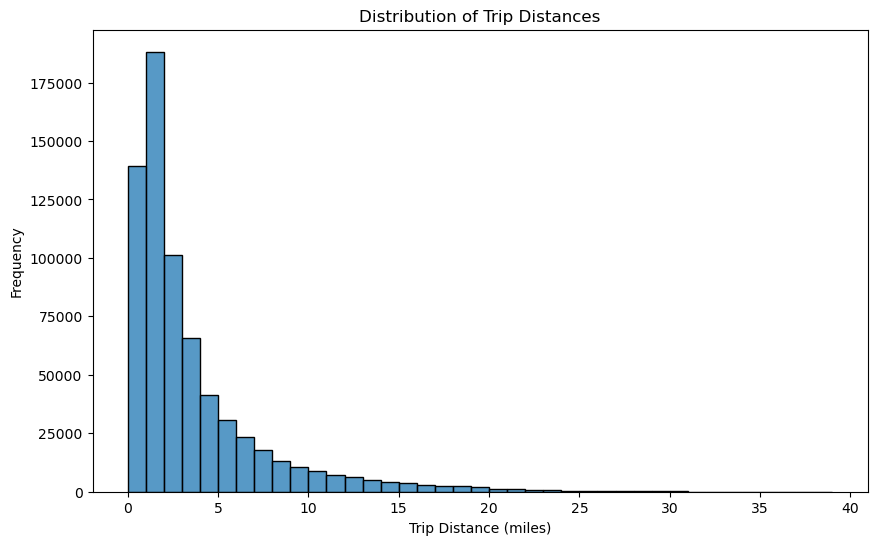

In [559]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: What is the distribution of trip distances?
def plot_trip_distance_distribution(dataframe):
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe['trip distance'], bins=range(0, 40, 1))
    plt.title('Distribution of Trip Distances')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Frequency')
    plt.show()


plot_trip_distance_distribution(df)

Most trips are the smaller trips, as the distance increases the number of trips decreases.

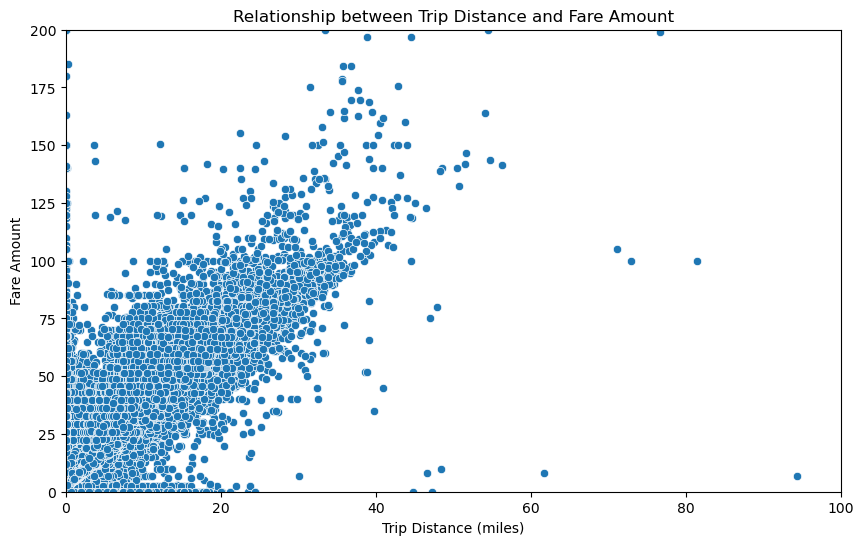

In [560]:
# Question 2: What is the relationship between trip distance and fare amount?
def plot_trip_distance_vs_fare(dataframe):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='trip distance', y='fare amount', data=dataframe)
    plt.title('Relationship between Trip Distance and Fare Amount')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Fare Amount')
    plt.xlim(0, 100)
    plt.ylim(0, 200) 
    plt.show()

# Call the function to plot the relationship between trip distance and fare amount
plot_trip_distance_vs_fare(df)

Most of time fare amount increases by increasing the trip distance.

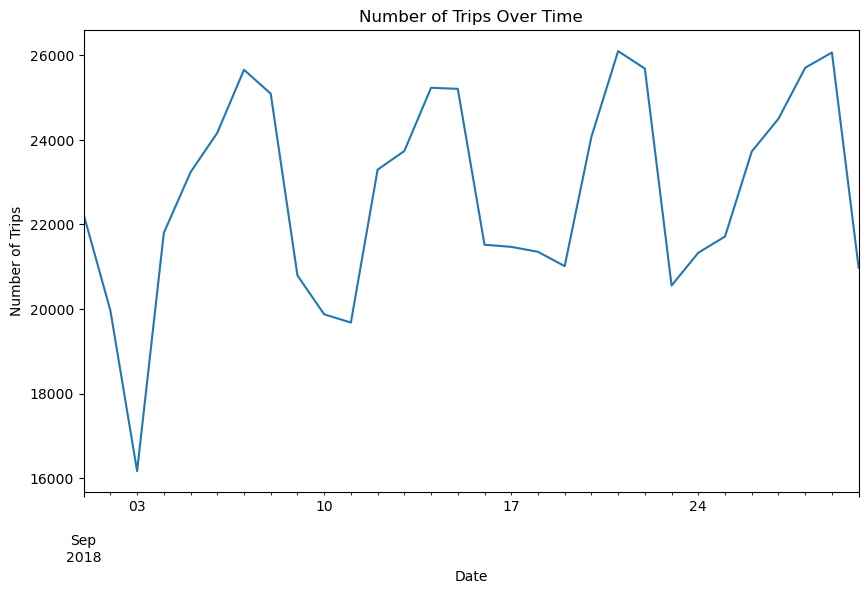

In [561]:
# Question 3: How does the number of trips change over time?
# First, convert pickup and dropoff times to datetime


def plot_trip_count_over_time(dataframe, start_date, end_date):
    
    df_copy = dataframe.copy()

    
    df_copy['lpep pickup datetime'] = pd.to_datetime(df_copy['lpep pickup datetime'])
    df_copy['lpep dropoff datetime'] = pd.to_datetime(df_copy['lpep dropoff datetime'])

    
    filtered_data = df_copy[(df_copy['lpep pickup datetime'] >= start_date) & (df_copy['lpep pickup datetime'] <= end_date)]

  
    trips_per_day = filtered_data.resample('D', on='lpep pickup datetime').size()

    plt.figure(figsize=(10, 6))
    trips_per_day.plot(kind='line')
    plt.xlabel('Date')
    plt.title('Number of Trips Over Time')
    plt.ylabel('Number of Trips')
    plt.show()


start_date = '2018-09-01'
end_date = '2018-10-01'


plot_trip_count_over_time(df, start_date, end_date)


Approximately in the wwekend the number of trips increase.

<Figure size 1000x600 with 0 Axes>

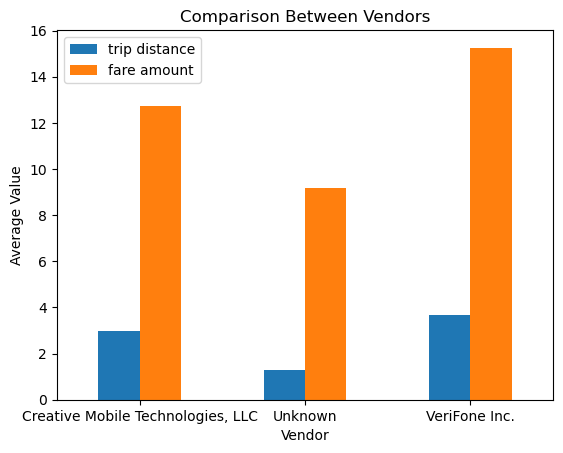

In [562]:
# Question 4: Are there differences between vendors?
def compare_vendors(dataframe):
    
    vendor_comparison = dataframe.groupby('Vendor')[['trip distance', 'fare amount']].mean()

   
    plt.figure(figsize=(10, 6))
    vendor_comparison.plot(kind='bar')
    plt.title('Comparison Between Vendors')
    plt.xlabel('Vendor')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.show()


compare_vendors(df)

VeriFone Inc. has the higher trip distances and higher fares.

<Figure size 1000x600 with 0 Axes>

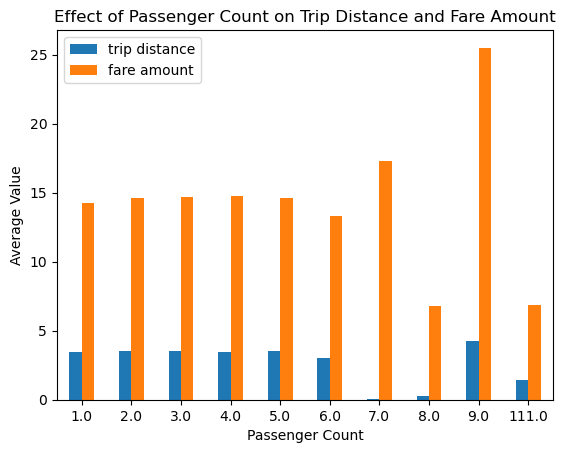

In [563]:
# Question 5: How does passenger count affect other variables?
def analyze_passenger_count(dataframe):
    
    passenger_comparison = dataframe.groupby('passenger count')[['trip distance', 'fare amount']].mean()


    plt.figure(figsize=(10, 6))
    passenger_comparison.plot(kind='bar')
    plt.title('Effect of Passenger Count on Trip Distance and Fare Amount')
    plt.xlabel('Passenger Count')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.show()

analyze_passenger_count(df)

Approximately most of the time the more passengers the higher the fare amount. But it seems that for 7 and 8 passenger rides , the trip distance is very small.

# 3 - Cleaning Data

## Tidying up column names

In [564]:
def rename_columns(dataframe):
    dataframe.columns = dataframe.columns.str.lower()
    dataframe.columns = [col.replace(' ', '_') for col in dataframe.columns]
rename_columns(df)
 

In [565]:
df.columns   

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

all column names became lower case and have no spaces.

## Observe inconsistent data

In [566]:
def remove_duplicates(dataframe):
    print("Number of duplicate rows = ", dataframe.duplicated().sum())
    dataframe.drop_duplicates(inplace=True)
    print("Number of duplicate rows after removing duplicates = ", dataframe.duplicated().sum())

    
    
remove_duplicates(df) 

Number of duplicate rows =  9
Number of duplicate rows after removing duplicates =  0


In [567]:

# change passenger_count data type to int  
def column_to_data_type(dataframe, column, data_type):
    print(f"original {column} data type: ", dataframe[column].dtype)
    dataframe[column] = dataframe[column].astype(data_type)
    print(f"updated {column} data type: ", dataframe[column].dtype)

In [568]:

def replace_with_mean(df,column):
   
    negative_count = (df[column] < 0).sum()
    print(f"Number of negative {column} = {negative_count}")
        
    if(negative_count>0):
     # Replace negative fares with the median fare
        index_of_first_negative = df[df[column] < 0].index[0]
        print("1st row having the issue ",df[df[column] < 0].head(1)[column] )
        mean_fare = df[df[column] >= 0][column].mean()
        print(column," mean ",mean_fare)
        df.loc[df[column] < 0, column] = mean_fare
        print("1st row having the issue after updating ", index_of_first_negative, df.loc[index_of_first_negative, column] )
        negative_count = (df[column] < 0).sum()
        print(f"updated Number of negative {column} = {negative_count}")

def column_negatives():
    numerical_columns = ['passenger_count', 'fare_amount', 'trip_distance', 'tip_amount', 'tolls_amount', 'total_amount']

    for column in numerical_columns:
        replace_with_mean(df,column)
column_negatives()        


Number of negative passenger_count = 0
Number of negative fare_amount = 1702
1st row having the issue  475   -25.0
Name: fare_amount, dtype: float64
fare_amount  mean  14.931773876105156
1st row having the issue after updating  475 14.931773876105156
updated Number of negative fare_amount = 0
Number of negative trip_distance = 0
Number of negative tip_amount = 7
1st row having the issue  13059   -0.99
Name: tip_amount, dtype: float64
tip_amount  mean  1.0349176429189333
1st row having the issue after updating  13059 1.0349176429189333
updated Number of negative tip_amount = 0
Number of negative tolls_amount = 0
Number of negative total_amount = 1700
1st row having the issue  475   -25.0
Name: total_amount, dtype: float64
total_amount  mean  17.38533426816416
1st row having the issue after updating  475 17.38533426816416
updated Number of negative total_amount = 0


In [569]:
# print(((df["improvement_surcharge"] != 0.3) & (df["improvement_surcharge"] != 0.0)).sum())
def replace_values_with(df, column, condition, new):
    before = (condition(df[column]))
    print(f"Sum of values that do not meet the condition before replacement: {before.sum()}")
    print(f"{df[before][column]}")
    df.loc[condition(df[column]), column] = new
    after = (condition(df[column]))
    print(f"Sum of values that do not meet the condition after replacement: {after.sum()}")
    
replace_values_with(df, 'improvement_surcharge', lambda x: (x != 0.3) & (x != 0.0),0)
replace_values_with(df, 'extra', lambda x: (x != 0.5) & (x != 0.0) & (x != 1.0),0)
replace_values_with(df, 'mta_tax', lambda x: (x != 0.5) & (x != 0.0)  ,0)


# print(((df['trip_distance'] == 0) ).sum())


Sum of values that do not meet the condition before replacement: 1636
1044     -0.3
1181     -0.3
1228     -0.3
1292     -0.3
1421     -0.3
         ... 
663996   -0.3
664023   -0.3
664876   -0.3
665651   -0.3
665697   -0.3
Name: improvement_surcharge, Length: 1636, dtype: float64
Sum of values that do not meet the condition after replacement: 0
Sum of values that do not meet the condition before replacement: 381591
19         NaN
23         NaN
96         NaN
176        NaN
180        NaN
          ... 
682027    2.75
682028    2.75
682029    2.75
682030    2.75
682031    2.75
Name: extra, Length: 381591, dtype: float64
Sum of values that do not meet the condition after replacement: 0
Sum of values that do not meet the condition before replacement: 1645
1044     -0.5
1181     -0.5
1228     -0.5
1292     -0.5
1421     -0.5
         ... 
663996   -0.5
664023   -0.5
664876   -0.5
665651   -0.5
665697   -0.5
Name: mta_tax, Length: 1645, dtype: float64
Sum of values that do not meet the co

## Findings and conclusions

there were 9 duplicate rows , so we removed them because they are too few and will affect our estimations.

passenger_count column is float which doesnot make sense, so will make it integer but not now 
as there are missing values we need to deal with them first.

All numerical columns which have negative inconsistent values are replaced with the mean of positive value instead of removing because there are alot of these columns.

improvement_surcharge column must be only of value 0 or 0.3, so any other value was replaced by default value 0. 
extra column must be only of value 0 or 0.5 or 1, so any other value was replaced by default value 0. 
mta_tax column must be only of value 0 or 0.5, so any other value was replaced by default value 0. 

## Observing Missing Data

In [570]:
def observe_missing(df):  
    print(df.isnull().sum())
    for col in df.columns:
        print(df[col].value_counts())   


In [571]:
observe_missing(df)

vendor                        0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        16132
rate_type                     0
pu_location                   0
do_location                   0
passenger_count           16744
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                682037
improvement_surcharge         0
total_amount                  0
payment_type              16028
trip_type                     0
congestion_surcharge     682037
dtype: int64
VeriFone Inc.                        580724
Creative Mobile Technologies, LLC    101310
Unknown                                   3
Name: vendor, dtype: int64
2018-09-26 13:01:00    10
2018-09-26 12:00:00     9
2018-09-26 10:34:00     9
2018-09-10 10:00:00     8
2018-09-20 12:58:00     8
                       ..
2018-09-12 10:59:05     1
2018-0

store_and_fwd_flag  has 16132 missing values. It’s likely that the data is Missing Not at Random (MNAR). This is because the missingness of this data seems to be dependent on its own values. If the vehicle had a stable data connection at all times during a trip, there would be no need to store and forward the data, and thus this field might not be recorded or could be left blank.

trip_distance has 7754 rows which are 0 which don't make sense. it is MCAR because it is randomly missing not dependeny on any data or variables.

 passenger_count has 16744 null values . this would be a case of data being Missing Completely at Random (MCAR). This is because it is manual entred record by driver which may be forgotten, the missingness is due to random factors and is not related to any observed or unobserved data

extra has 364691 missing values. it’s likely that the data is Missing Completely Not at Random (MNAR). This is because the missingness of this data seems to be related to the ‘extra’ charges were not applicable for a trip. 

trip_type has 16133 unknown values. it is MNAR as it may be missing because it is likely a streer-hail and this field is not recorded.

ehail_fee has 682037 missing values which nearly missed for all records. this would be a case of data being Missing Not at Random (MNAR). This is because  may be ehail_fee is added after records are recorded.

vendor has 3 unknown values MCAR as it is due to random reasons.

rate_type has 16134 unknown values MNAR as it may be the default value 'Standard rate' so it is not recorded.

payment_type 16132 unknown values and 34 uknown whic seems to be MCAR as it is due to random reasons.

congestion_surcharge has 682037 null values. the data is Missing Completely Not at Random (MNAR). This is because the missingness of this data seems to be related to the ‘congestion_surcharge’ charges were not applicable before 2019.

## Handling Missing data

In [572]:
def handle_missing(df, column, replacement):
    
        
    print(f'Column {column} replacement value ', replacement)

    df[column].replace('Unknown', np.nan, inplace=True)
    df[column].replace('Uknown', np.nan, inplace=True)
    
    if column == 'ehail_fee':
        df.loc[df['trip_type'] == 'street-hail', column] = replacement
        df.loc[df['trip_type'] != 'street-hail', column] = 0
    
    # Fill missing values in the column with the specified replacement
    if (column == 'vendor'):
        df.dropna(axis='index', subset=[column], inplace=True)
    elif column == 'trip_distance':
        df[column].replace(0, replacement, inplace=True)
    else:    
        df[column].fillna(value=replacement, inplace=True)
     

In [573]:
def handle_missing_columns(df):
    handle_missing(df,'store_and_fwd_flag','N')
    handle_missing(df,'passenger_count',df['passenger_count'].mean())
    handle_missing(df,'trip_distance',df['trip_distance'].mean())
    handle_missing(df,'extra',0)
    handle_missing(df,'trip_type','Street-hail')
    handle_missing(df,'ehail_fee',0.5)
    handle_missing(df,'vendor','drop')
    handle_missing(df,'rate_type','Standard rate')
    handle_missing(df,'payment_type',df['payment_type'].mode().iloc[0])
    df.drop('congestion_surcharge', axis=1, inplace=True)



In [574]:
handle_missing_columns(df)

Column store_and_fwd_flag replacement value  N
Column passenger_count replacement value  1.3456386885176908
Column trip_distance replacement value  3.5776375181991593
Column extra replacement value  0
Column trip_type replacement value  Street-hail
Column ehail_fee replacement value  0.5
Column vendor replacement value  drop
Column rate_type replacement value  Standard rate
Column payment_type replacement value  Credit card


In [575]:
observe_missing(df)

vendor                   0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_type                0
pu_location              0
do_location              0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64
VeriFone Inc.                        580724
Creative Mobile Technologies, LLC    101310
Name: vendor, dtype: int64
2018-09-26 13:01:00    10
2018-09-26 10:34:00     9
2018-09-26 12:00:00     9
2018-09-26 10:55:00     8
2018-09-05 10:11:00     8
                       ..
2018-09-12 12:05:30     1
2018-09-12 11:15:57     1
2018-09-12 11:06:29     1
2018-09-12 11:34:22     1
2018-10-01 00:23:15     1
Name: lpep_pickup_datetime, Length: 576245, dtype: int64
2018-09-02 00:00

we can now change the type of passenger_count to int 

In [576]:
column_to_data_type(df, 'passenger_count', int)

original passenger_count data type:  float64
updated passenger_count data type:  int32


## Findings and conclusions

store_and_fwd_flag: Since it's likely MNAR,  replace 'Unknown' with NaN and then conditionally fill it with 'N' when applicable.

trip_distance: Since it's MCAR with zero values,  replace zero with the mean value of the column.

passenger_count: As it's MCAR,  replace missing values with the mean value of the column.

extra: Likely MNAR, so  replace 'Unknown' with NaN and fill missing values with 0.

trip_type: It's MNAR, so  replace 'Unknown' with NaN and conditionally fill it with 'Street-hail'.

ehail_fee: Likely MNAR,  replace 'Unknown' with NaN and fill based on the 'trip_type'.

vendor: Since it's MCAR with only three unknown values,  drop rows where 'vendor' is unknown.

rate_type:  MNAR with all rows missing , so drop it.

payment_type: It's MNAR with 'Unknown' and 'Uknown' values, so  replace these with NaN and fill missing values with the mode of the column.

congestion_surcharge:  MNAR, so we dropped it as it is empty before 2019.


Resulting data has no missing values and all handles properly. Also we changed passenger_count data type to int instead of float

## Observing outliers

In [577]:
def get_skewing(df,numerical_columns):
    for col in numerical_columns:
        print (f"skewing of {col} is {df[col].skew()}") 
numerical_columns = df.select_dtypes(include='number')    
get_skewing(df,numerical_columns)

skewing of passenger_count is 12.656848712081663
skewing of trip_distance is 651.6215663023623
skewing of fare_amount is 182.8504241017911
skewing of extra is 0.7882043160656785
skewing of mta_tax is -7.042514037390077
skewing of tip_amount is 40.1969349941974
skewing of tolls_amount is 8.437671758140835
skewing of ehail_fee is 0
skewing of improvement_surcharge is -3.532096224273331
skewing of total_amount is 153.76835850296703


it appears that all columns aren't normally distributed so we will identify outliers using  IQR.

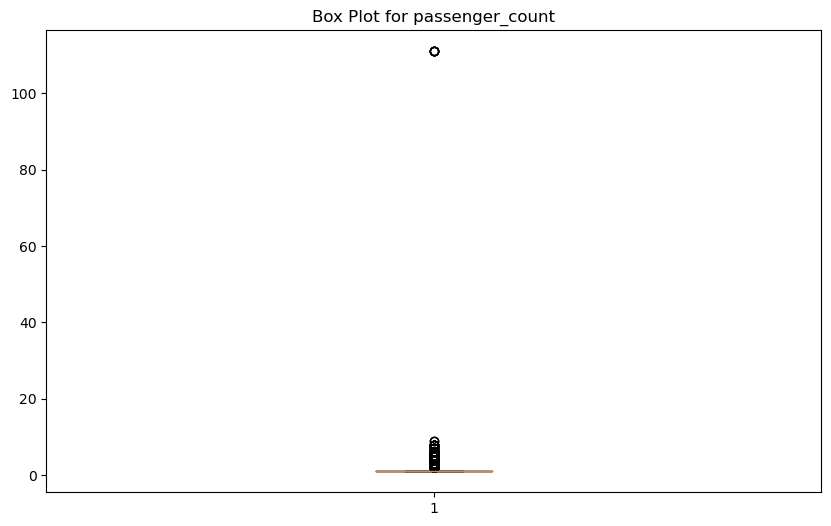

 outliers= 98703
 unique values of passenger_count are 10


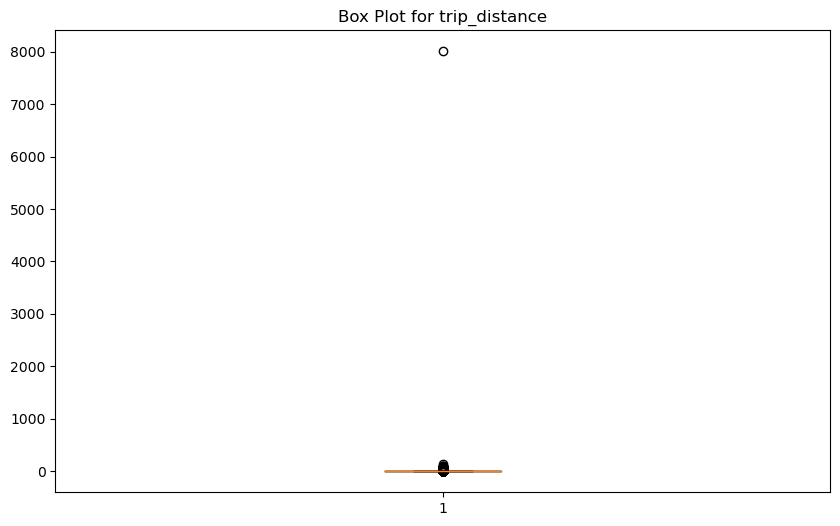

 outliers= 58882
 unique values of trip_distance are 3269


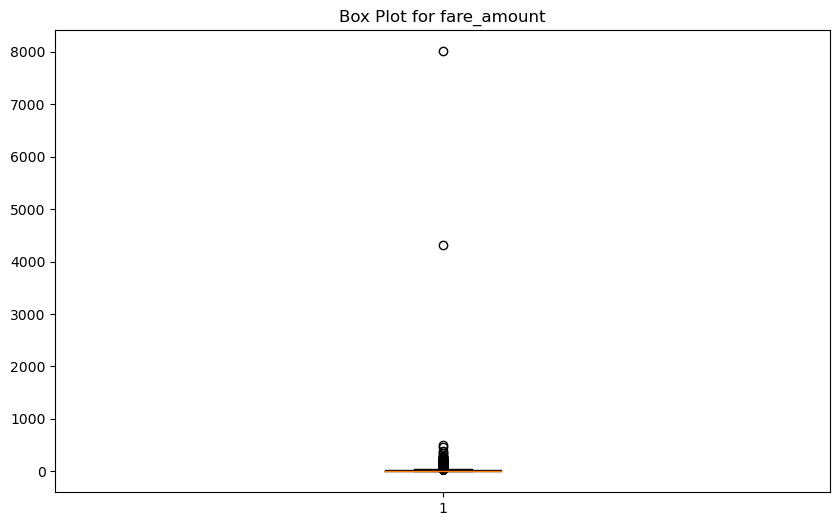

 outliers= 53337
 unique values of fare_amount are 4418


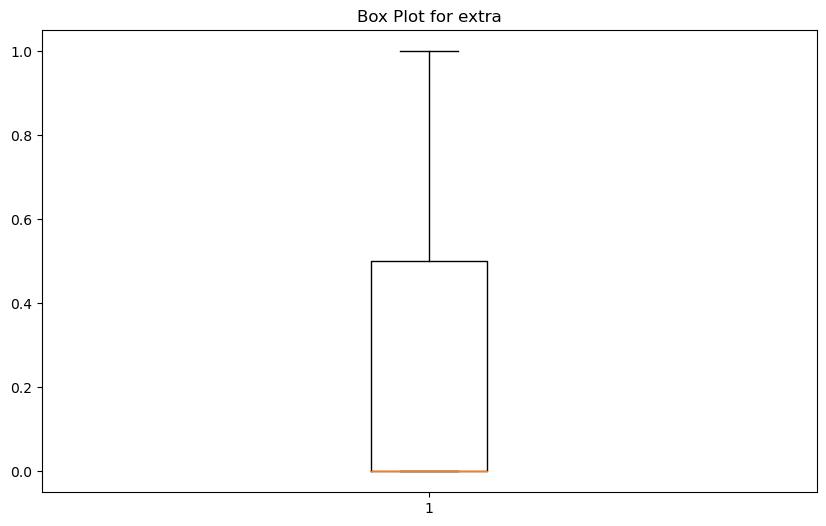

 outliers= 0
 unique values of extra are 3


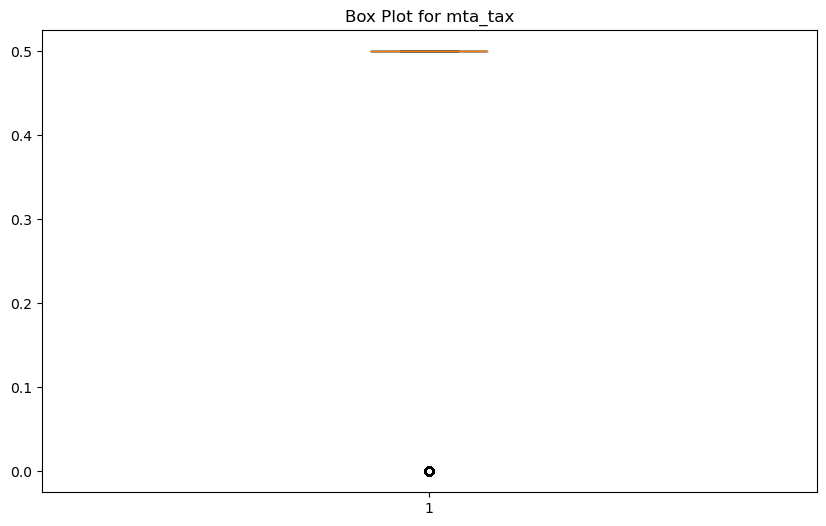

 outliers= 12972
 unique values of mta_tax are 2


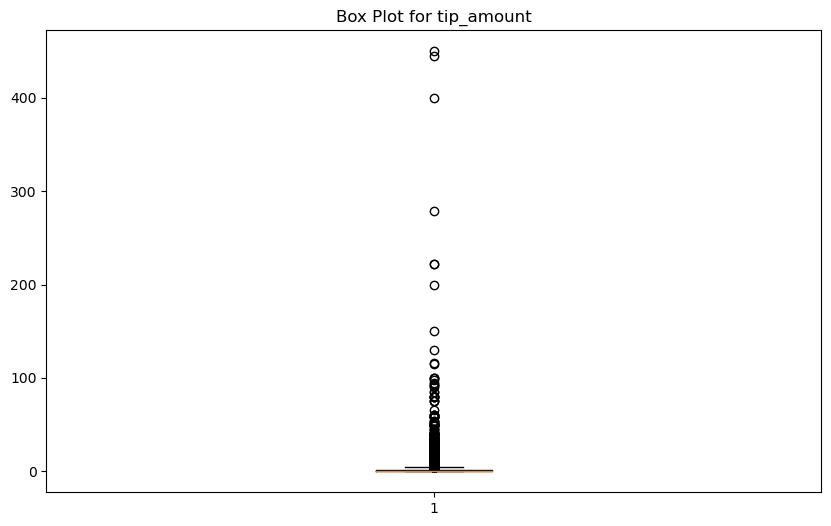

 outliers= 42761
 unique values of tip_amount are 1671


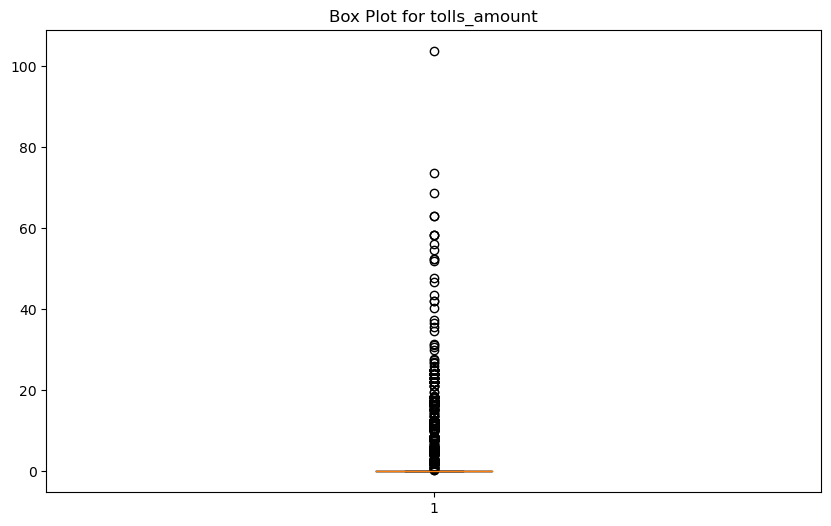

 outliers= 28062
 unique values of tolls_amount are 118


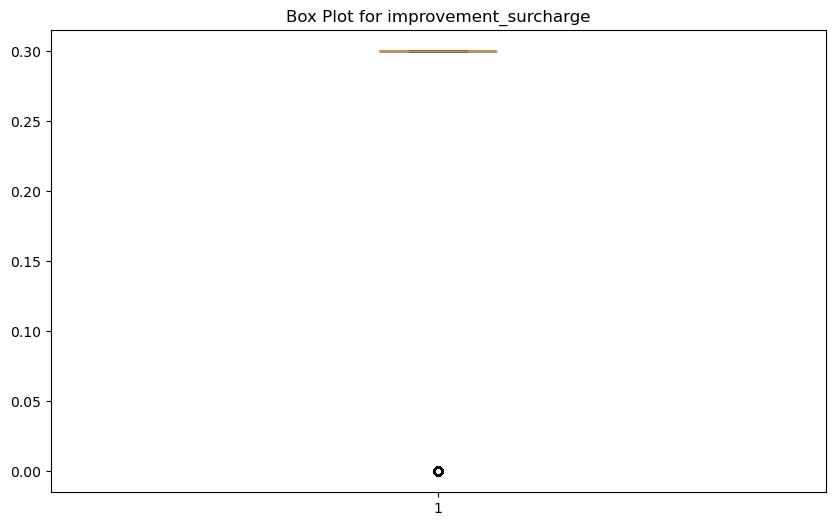

 outliers= 44270
 unique values of improvement_surcharge are 2


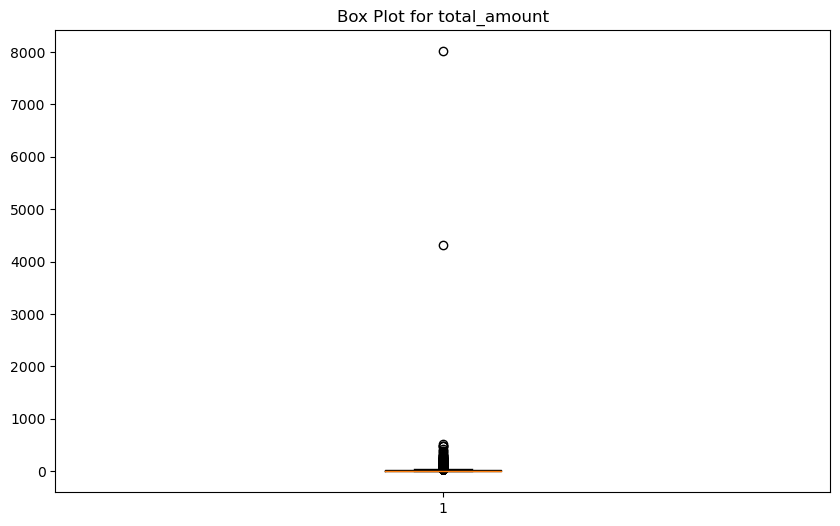

 outliers= 53613
 unique values of total_amount are 6900


In [578]:
def box_plot(df,numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(10,6))
        plt.boxplot(df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

# Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f" outliers= {((df[col] < lower_bound) | (df[col] > upper_bound)).sum()}")
        print (f" unique values of {col} are {df[col].nunique()}")
numerical_columns = df.select_dtypes(include='number')
columns_to_drop = ['ehail_fee']  
numerical_columns = numerical_columns.drop(columns=columns_to_drop)        
box_plot(df,numerical_columns)        

it appears that there are alo of outliers so we can't remove them.

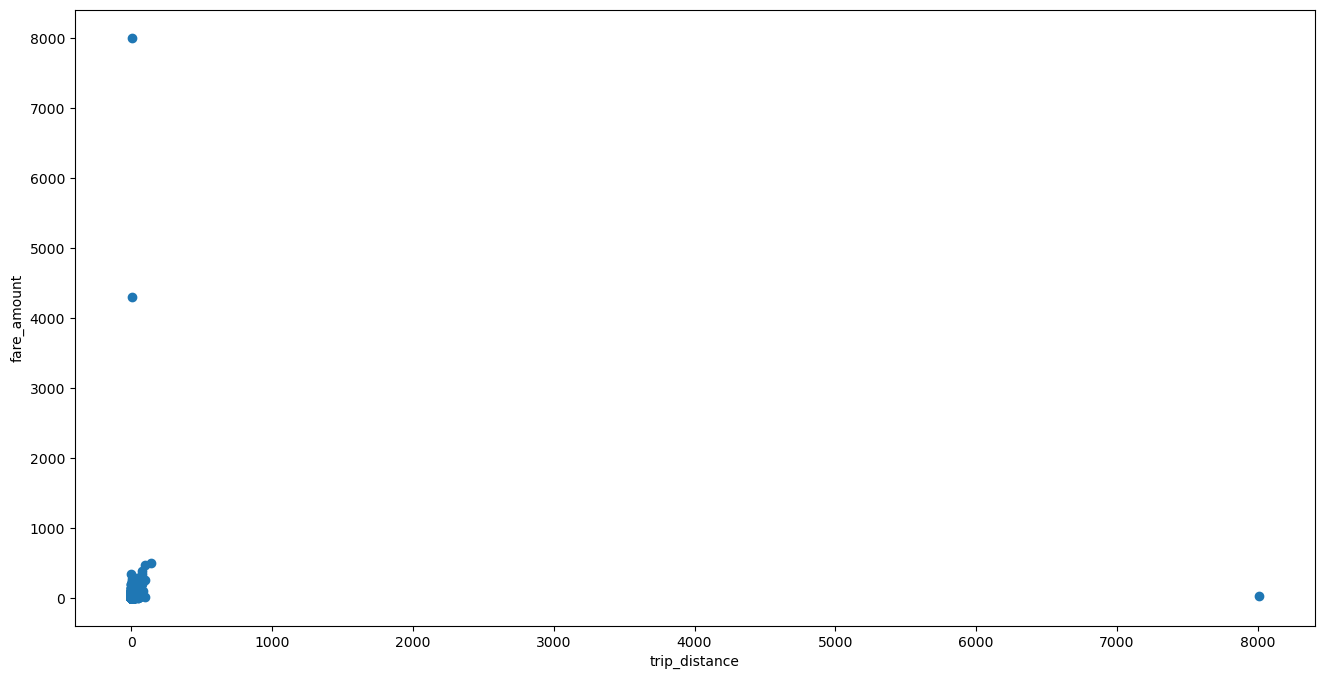

In [579]:
def multi_variant(df,col1,col2):   
    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(df[col1], df[col2])
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    plt.show()
multi_variant(df,'trip_distance','fare_amount')    

## Handling outliers

In [580]:
def clip_outliers_with_q1_q3(df,columns):
    for col in columns:
#         print(df[col].isna().sum())  # Check how many missing values are in the column
#         print(col)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr=q3-q1
        print(q1,q3)
        df[col] = np.where(df[col] <q1-1.5*iqr, q1-1.5*iqr,df[col])
        df[col] = np.where(df[col] >q3+1.5*iqr, q3+1.5*iqr,df[col])
def clip_outliers_with_log(df,columns):
    for col in columns:
        df[col] = np.log1p(df[col])
def clip_with_z(df,columns):
    for col in columns:
        median = df[col].median()
        cutoff_pos = df[col].mean() + df[col].std() * 3
        cutoff_neg = df[col].mean() - df[col].std() * 3
        condition_series = (( df[col]> cutoff_pos) | (df[col] < cutoff_neg))
        df[col] = np.where(condition_series, median,df[col])

# clip_outliers_with_q1_q3(df,['fare_amount', 'total_amount']) 
# clip_outliers_with_log(df,numerical_columns.drop(columns=columns_to_drop1))
# clip_with_z(df,numerical_columns.drop(columns=columns_to_drop1))

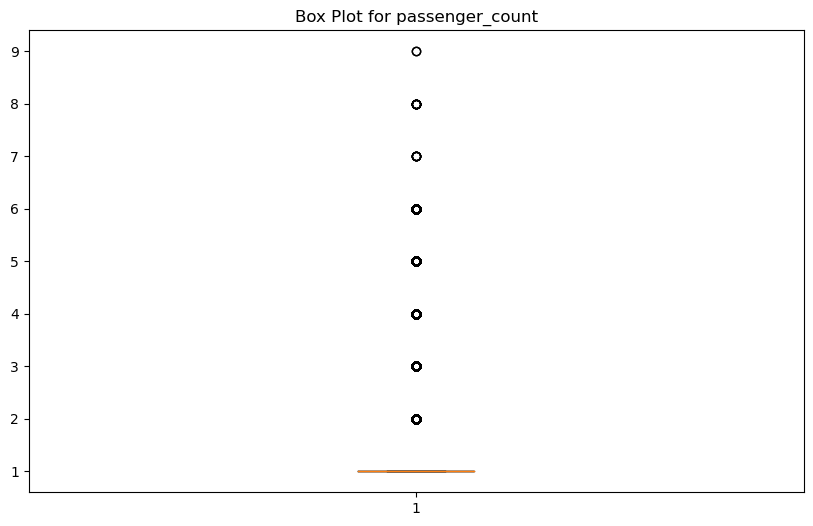

 outliers= 98697
 unique values of passenger_count are 9


In [581]:
def passenger_count_outliers(df):
    df.drop(df[df['passenger_count'] > 10].index, inplace=True)
# box_plot(df,['fare_amount', 'total_amount']) 
# # clip_outliers_with_q1_q3(df,numerical_columns.drop(columns=columns_to_drop1))
# # box_plot(df,numerical_columns)
# get_summary_for_outliers(df)
passenger_count_outliers(df)
box_plot(df,['passenger_count']) 

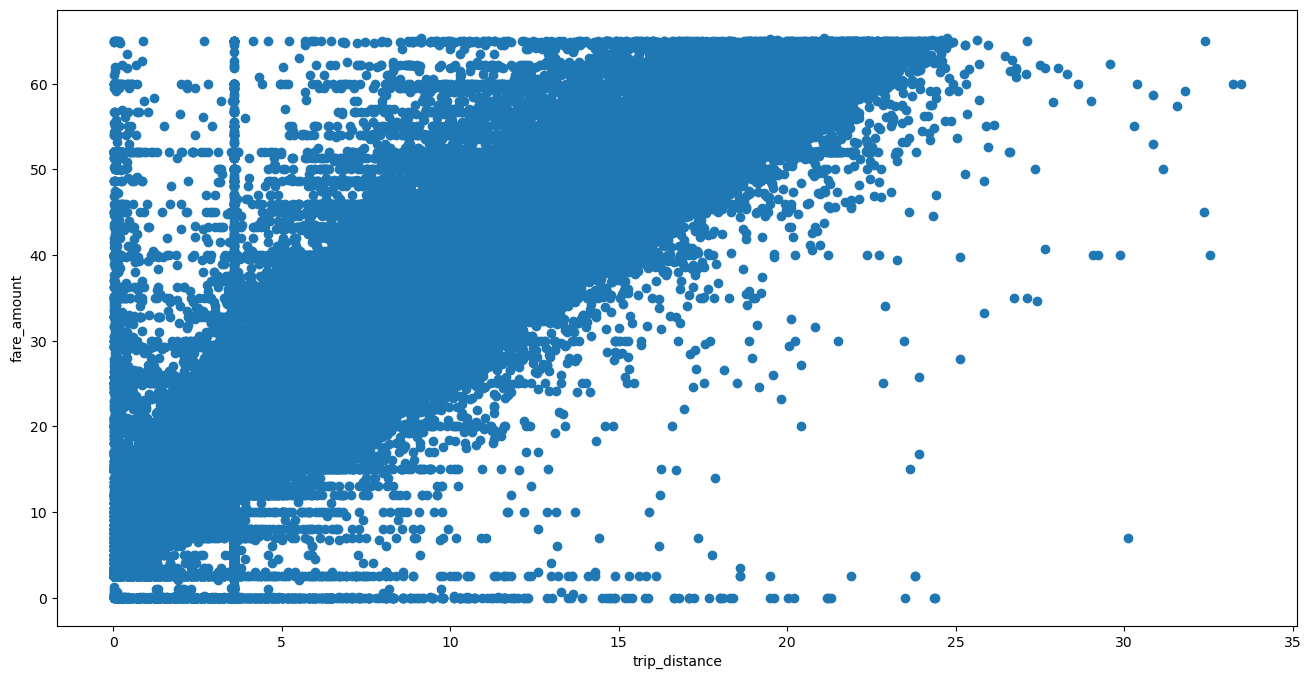

In [582]:
def handle_multi_variant(df,col1,col2, zscore_threshold=3):
    z_scores_col1 = np.abs((df[col1] - df[col1].mean()) / df[col1].std())
    z_scores_col2 = np.abs((df[col2] - df[col2].mean()) / df[col2].std())
    outliers = (z_scores_col1 > zscore_threshold) | (z_scores_col2 > zscore_threshold)
    df.drop(df[outliers].index, inplace=True)
    
handle_multi_variant(df,'trip_distance','fare_amount') 
multi_variant(df,'trip_distance','fare_amount') 


## Findings and conclusions

removed outliers in scatter plot of 'trip_distance','fare_amount' 

passenger_count has outlier value 111 which doesn't make sense, it is more logic that a ride doesn't have more than 10 passengers

can't remove outliers as removing them will remove more than 60% of unique values which will keep very few unique values.

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

In [583]:

def create_discretize(df):
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
    df['week_number'] = df['lpep_pickup_datetime'].dt.strftime('%U')
    df['date_range'] = df['lpep_pickup_datetime'].dt.to_period('W').dt.to_timestamp()
    df['date_range'] = pd.to_datetime(df['date_range'])
    print(df[['lpep_pickup_datetime', 'week_number', 'date_range']].head())
    print(df[['lpep_pickup_datetime', 'week_number', 'date_range']].tail())
create_discretize(df)
    

  lpep_pickup_datetime week_number date_range
0  2018-09-01 00:52:38          34 2018-08-27
1  2018-09-01 00:32:40          34 2018-08-27
2  2018-09-01 00:07:55          34 2018-08-27
3  2018-09-01 00:53:25          34 2018-08-27
4  2018-09-01 00:14:33          34 2018-08-27
       lpep_pickup_datetime week_number date_range
682033  2018-10-01 00:24:19          39 2018-10-01
682034  2018-10-01 00:12:06          39 2018-10-01
682035  2018-10-01 00:34:42          39 2018-10-01
682036  2018-10-01 00:50:21          39 2018-10-01
682037  2018-10-01 00:23:15          39 2018-10-01


In [584]:
column_to_data_type(df, 'week_number', int)


original week_number data type:  object
updated week_number data type:  int32


## 4.11 - Findings and conclusions

converted lpep_pickup_datetime and lpep_dropoff_datetime to datetime then created week_number and date_range columns . week_number represents the week number of the year and date_range represents the start date of this week. 

## 4.2 - Encoding

In [585]:
def details_for_encoding(df):  
    categorical_columns = df.select_dtypes(include=['object'])
    for col in categorical_columns:
        print(df[col].value_counts())
details_for_encoding(df)        

VeriFone Inc.                        575682
Creative Mobile Technologies, LLC    100949
Name: vendor, dtype: int64
N    674944
Y      1687
Name: store_and_fwd_flag, dtype: int64
Standard rate            649226
Negotiated fare           25644
JFK                        1239
Nassau or Westchester       352
Newark                      163
Group ride                    7
Name: rate_type, dtype: int64
Manhattan,East Harlem North               44532
Manhattan,East Harlem South               37627
Manhattan,Central Harlem                  35733
Queens,Astoria                            28279
Queens,Elmhurst                           27550
                                          ...  
Manhattan,Flatiron                            1
Manhattan,Penn Station/Madison Sq West        1
Queens,Jamaica Bay                            1
Manhattan,Chinatown                           1
Manhattan,East Village                        1
Name: pu_location, Length: 228, dtype: int64
Manhattan,East Harlem North

In [586]:
from sklearn import preprocessing

def label_encoding(df, categorical_columns):
    lookup_table = {}
    for column in categorical_columns:
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        lookup_table[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return lookup_table
categorical_columns = df.select_dtypes(include=['object']).drop(columns=['pu_location','do_location'])        
lookup=label_encoding(df,categorical_columns)
print(lookup)

{'vendor': {'Creative Mobile Technologies, LLC': 0, 'VeriFone Inc.': 1}, 'store_and_fwd_flag': {'N': 0, 'Y': 1}, 'rate_type': {'Group ride': 0, 'JFK': 1, 'Nassau or Westchester': 2, 'Negotiated fare': 3, 'Newark': 4, 'Standard rate': 5}, 'payment_type': {'Cash': 0, 'Credit card': 1, 'Dispute': 2, 'No charge': 3}, 'trip_type': {'Dispatch': 0, 'Street-hail': 1}}


In [587]:
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]
# manually encode the most frequent values in a catgeorical feature.
def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0)
#     df.drop(variable, axis=1, inplace=True)    
for col in ['pu_location','do_location']:
    top_x = calculate_top_categories(df,col,5)
    one_hot_encode(df,col,top_x)

In [588]:
# details_for_encoding(df) 
def count_unique(df,columns):  
    #categorical_columns = df.select_dtypes(include=['object'])
    for col in columns:
        print(df[col].value_counts())
count_unique(df,df.columns)        

1    575682
0    100949
Name: vendor, dtype: int64
2018-09-26 13:01:00    10
2018-09-26 12:00:00     9
2018-09-26 10:34:00     9
2018-09-14 10:32:00     8
2018-09-20 12:58:00     8
                       ..
2018-09-12 11:40:28     1
2018-09-12 11:46:34     1
2018-09-12 11:28:42     1
2018-09-12 11:43:25     1
2018-10-01 00:23:15     1
Name: lpep_pickup_datetime, Length: 572786, dtype: int64
2018-09-02 00:00:00    34
2018-09-30 00:00:00    32
2018-09-23 00:00:00    29
2018-09-04 00:00:00    28
2018-09-24 00:00:00    27
                       ..
2018-09-12 11:33:16     1
2018-09-12 12:36:50     1
2018-09-12 12:06:41     1
2018-09-12 12:29:33     1
2018-10-01 00:24:09     1
Name: lpep_dropoff_datetime, Length: 572806, dtype: int64
0    674944
1      1687
Name: store_and_fwd_flag, dtype: int64
5    649226
3     25644
1      1239
2       352
4       163
0         7
Name: rate_type, dtype: int64
Manhattan,East Harlem North               44532
Manhattan,East Harlem South               37627
M

## 4.22 - Findings and conlcusions

all categorical columns except 'pu_location','do_location' are label encoded because they have few unique values

lookup table is created while label encoding

'pu_location','do_location' are one hot encoded with 5 top frequent values because they have more than 200 unique values which will make the data set has a large number of columns

I will not drop 'pu_location','do_location' now until extracting gps from them.

## 4.3 - Normalisation 

In [589]:
get_skewing(df,['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount','total_amount'])

skewing of passenger_count is 3.4103598147241523
skewing of trip_distance is 2.1975649295766364
skewing of fare_amount is 1.8492536186549455
skewing of tip_amount is 42.94441112912854
skewing of tolls_amount is 8.94930139976746
skewing of total_amount is 2.1211582636034176


In [590]:
from sklearn.preprocessing import StandardScaler

from scipy import stats

from scipy import stats

def box_cox_normalization(dataframe, columns):
    for col in columns:
        # Get the index of all positive values (Box-Cox only takes positive values)
        index = dataframe[col] > 0
        # Select only from the column we're currently processing
        positive_vals = dataframe.loc[index, col]
        # Apply Box-Cox transformation
        normalized_vals, _ = stats.boxcox(positive_vals)
        # Assign the transformed data back to the original dataframe
        dataframe.loc[index, col] = normalized_vals
    return dataframe





columns_to_normalize = ['tip_amount']
df = box_cox_normalization(df, columns_to_normalize)
get_skewing(df,columns_to_normalize)    

skewing of tip_amount is 1.7131855809170264


In [591]:
count_unique(df, ['tip_amount']) 

0.000000    451032
0.730643     13414
1.194790      5173
0.459924      4706
0.526675      4597
             ...  
1.813735         1
2.615502         1
4.535412         1
3.306651         1
3.350149         1
Name: tip_amount, Length: 1440, dtype: int64


In [592]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling(dataframe, columns):
    scaler = MinMaxScaler()
    for col in columns:
        # Ensure the column is in a 2D shape for the scaler
        col_data = dataframe[col].values.reshape(-1, 1)
        scaled = scaler.fit_transform(col_data)
        dataframe[col] = scaled
    return dataframe

columns_to_scale = ['passenger_count', 'trip_distance', 'fare_amount', 'tolls_amount', 'total_amount','tip_amount']


df = min_max_scaling(df, columns_to_scale)

count_unique(df, ['passenger_count', 'trip_distance', 'fare_amount', 'tolls_amount', 'total_amount','tip_amount']) 


0.000    578678
0.125     50992
0.500     22044
0.625     11732
0.250      9760
0.375      3405
0.875        12
0.750         6
1.000         2
Name: passenger_count, dtype: int64
0.106656    7617
0.029596    6293
0.026607    6129
0.023617    6116
0.032586    5879
            ... 
0.819432       1
0.662481       1
0.712706       1
0.930643       1
0.758744       1
Name: trip_distance, Length: 2475, dtype: int64
0.091771    30459
0.099419    29300
0.107066    29215
0.084124    28631
0.076476    26411
            ...  
0.700061        1
0.006577        1
0.831294        1
0.743805        1
0.912053        1
Name: fare_amount, Length: 3942, dtype: int64
0.000000    651423
0.055572     22103
0.025470      1293
0.111143       689
0.020839       592
             ...  
0.460781         1
0.303907         1
0.004824         1
0.389001         1
0.110564         1
Name: tolls_amount, Length: 93, dtype: int64
0.015918    20380
0.014898    19823
0.013878    19542
0.016939    18972
0.017959    182

In [593]:
get_skewing(df,columns_to_normalize)

skewing of tip_amount is 1.71318558091703


## 4.31 - Findings and conclusions

firstly we normalized tip_amount as it was highly skewed. so the skew after normalization becomes close to 0.

then we scaled all numerical columns to have same range from 0 to 1 as resulted from count_unique function.

## 4.4 - Adding more features(feature eng.)

In [594]:
def add_2_columns(df):
    df['is_weekend'] = df['lpep_pickup_datetime'].dt.dayofweek.isin([5, 6]).astype(int)
    df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
    return df
df=add_2_columns(df)
print(df.head())
print(df.tail())

   vendor lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0       1  2018-09-01 00:52:38   2018-09-01 01:05:00                   0   
1       1  2018-09-01 00:32:40   2018-09-01 00:47:18                   0   
2       1  2018-09-01 00:07:55   2018-09-01 00:15:19                   0   
3       1  2018-09-01 00:53:25   2018-09-01 00:58:03                   0   
4       1  2018-09-01 00:14:33   2018-09-01 00:30:57                   0   

   rate_type                            pu_location  \
0          5                        Queens,Flushing   
1          5  Queens,Long Island City/Hunters Point   
2          5             Brooklyn,East Williamsburg   
3          5                    Brooklyn,Greenpoint   
4          5            Brooklyn,DUMBO/Vinegar Hill   

                          do_location  passenger_count  trip_distance  \
0                  Queens,Kew Gardens            0.000       0.163229   
1                     Queens,Elmhurst            0.500       0.103

## 4.41 - Findings and concluisons

we added a column is_weekend to  indicating whether the trip was on a weekend or not having values of 0 or 1

we added "trip_duration" column as a combination of two columns. the trip duration will be got by subtracting the pickup time from the drop-off time. 

## 4.5 - Additional data extraction (GPS coordinates)

In [595]:
import os
import requests
import numpy as np
def get_coordinates(location):
    url = f"https://geocode.maps.co/search?q={location}"
    response = requests.get(url)
    data = response.json()
    if data:
        return data[0]['lat'], data[0]['lon']
    else:
        return np.nan, np.nan
def populate_coordinates(df):
    if os.path.exists('unique_location_coordinates.csv'):
        coordinates_df = pd.read_csv('unique_location_coordinates.csv',index_col='location')
        print (coordinates_df)
        df['pu_lat'] = df['pu_location'].map(coordinates_df['latitude'])
        df['pu_long'] = df['pu_location'].map(coordinates_df['longitude'])
        df['do_lat'] = df['do_location'].map(coordinates_df['latitude'])
        df['do_long'] = df['do_location'].map(coordinates_df['longitude'])
    else:
        unique_locations = pd.concat([df['pu_location'], df['do_location']]).unique()
        coordinates_df = pd.DataFrame(unique_locations, columns=['location'])
        coordinates_df[['latitude', 'longitude']] = coordinates_df['location'].apply(get_coordinates).apply(pd.Series)
        coordinates_df.set_index('location', inplace=True)
        coordinates_df.to_csv('unique_location_coordinates.csv')
        df['pu_lat'] = df['pu_location'].map(coordinates_df['latitude'])
        df['pu_long'] = df['pu_location'].map(coordinates_df['longitude'])
        df['do_lat'] = df['do_location'].map(coordinates_df['latitude'])
        df['do_long'] = df['do_location'].map(coordinates_df['longitude'])

populate_coordinates(df)  
print(df)


                                                  latitude  longitude
location                                                             
Queens,Flushing                                  40.765430 -73.817429
Queens,Long Island City/Hunters Point            40.742195 -73.956098
Brooklyn,East Williamsburg                       40.714622 -73.953450
Brooklyn,Greenpoint                              40.723713 -73.950971
Brooklyn,DUMBO/Vinegar Hill                      40.701520 -73.982637
...                                                    ...        ...
Manhattan,SoHo                                   40.722880 -73.998750
Staten Island,Eltingville/Annadale/Prince's Bay        NaN        NaN
Manhattan,Battery Park                           40.703031 -74.015788
Queens,Broad Channel                             40.606401 -73.819019
Staten Island,Arden Heights                      40.557441 -74.188581

[259 rows x 2 columns]
        vendor lpep_pickup_datetime lpep_dropoff_datetime  store_a

now we drop  'pu_location','do_location'

In [596]:
df.drop(['pu_location','do_location'], axis=1, inplace=True)    

## 4.6 - Csv file for lookup

In [597]:
print(lookup)

{'vendor': {'Creative Mobile Technologies, LLC': 0, 'VeriFone Inc.': 1}, 'store_and_fwd_flag': {'N': 0, 'Y': 1}, 'rate_type': {'Group ride': 0, 'JFK': 1, 'Nassau or Westchester': 2, 'Negotiated fare': 3, 'Newark': 4, 'Standard rate': 5}, 'payment_type': {'Cash': 0, 'Credit card': 1, 'Dispute': 2, 'No charge': 3}, 'trip_type': {'Dispatch': 0, 'Street-hail': 1}}


In [609]:
def save_lookup_table(lookup):
    lookup_df = pd.DataFrame([{"column_name": column_name, "original_value": original_value, "imputed_value": imputed_value}
    for column_name, mapping in lookup.items()
    for original_value, imputed_value in mapping.items()])
    lookup_df.to_csv('lookup_table_green_taxis.csv', index=False)
    return lookup_df

In [610]:
lookup_df=save_lookup_table(lookup)
lookup_df

,column_name,original_value,imputed_value
0,vendor,"Creative Mobile Technologies, LLC",0
1,vendor,VeriFone Inc.,1
2,store_and_fwd_flag,N,0
3,store_and_fwd_flag,Y,1
4,rate_type,Group ride,0
5,rate_type,JFK,1
6,rate_type,Nassau or Westchester,2
7,rate_type,Negotiated fare,3
8,rate_type,Newark,4
9,rate_type,Standard rate,5


## 5- Exporting the dataframe to a csv file or parquet

In [605]:
save_to_csv_parquet(df):
    df.to_parquet('green_trip_data_{2019}-{09}clean.parquet')
    df.to_csv('green_trip_data_{2019}-{09}clean.csv')

In [606]:
save_to_csv_parquet(df)